<a href="https://colab.research.google.com/github/piercepatrick/Football-Position-Classification/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install sidetable for visualizing null values in a clean table
! pip install sidetable --quiet

In [25]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import sidetable

In [3]:
# Read in data
df = pd.read_csv('/content/drive/My Drive/DS/Football Position Classifier/Data/football_final_df.csv')

In [4]:
# Quick overview of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12380 entries, 0 to 12379
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12380 non-null  int64  
 1   first_name       12380 non-null  object 
 2   last_name        12380 non-null  object 
 3   state            12380 non-null  object 
 4   position         12378 non-null  object 
 5   height           12294 non-null  object 
 6   weight           12237 non-null  float64
 7   forty_yard_dash  10692 non-null  float64
 8   shuttle_run      11218 non-null  object 
 9   three_cone       11070 non-null  float64
 10  broad_jump       11235 non-null  float64
 11  vertical_jump    11012 non-null  float64
 12  conditions       12380 non-null  object 
 13  grade            12288 non-null  object 
 14  height_inches    12294 non-null  float64
 15  profile_listed   12380 non-null  int64  
 16  warm             12380 non-null  int64  
 17  sunny       

In [5]:
# Descriptive statistics for each column
df.describe(include='all')

,Unnamed: 0,first_name,last_name,state,position,height,weight,forty_yard_dash,shuttle_run,three_cone,broad_jump,vertical_jump,conditions,grade,height_inches,profile_listed,warm,sunny,cold,windy,rainy,hot,cool
count,12380.000000,12380,12380,12380,12378,12294,12237.000000,10692.000000,11218,11070.000000,11235.000000,11012.000000,12380,12288,12294.000000,12380.000000,12380.000000,12380.000000,12380.000000,12380.000000,12380.000000,12380.000000,12380.000000
unique,NaN,4076,5519,49,10,24,NaN,NaN,1969,NaN,NaN,NaN,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Michael,Williams,GA,WR,5'8,NaN,NaN,4.614,NaN,NaN,NaN,sunny,Junior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,165,178,1664,2306,1888,NaN,NaN,25,NaN,NaN,NaN,3710,4618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,815.129564,NaN,NaN,NaN,NaN,NaN,183.777682,5.192784,NaN,7.882400,98.171144,24.266636,NaN,NaN,69.092810,0.656704,0.291680,0.689661,0.100081,0.085784,0.085784,0.098304,0.124475
std,509.889811,NaN,NaN,NaN,NaN,NaN,44.208193,0.451295,NaN,1.139506,12.047346,4.058644,NaN,NaN,2.843044,0.474828,0.454554,0.462651,0.300120,0.280055,0.280055,0.297737,0.330136
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,4.350000,NaN,6.410000,24.300000,0.000000,NaN,NaN,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,388.000000,NaN,NaN,NaN,NaN,NaN,154.000000,4.885000,NaN,7.430000,91.000000,21.700000,NaN,NaN,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,778.000000,NaN,NaN,NaN,NaN,NaN,173.000000,5.088000,NaN,7.780000,99.000000,24.400000,NaN,NaN,69.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1181.250000,NaN,NaN,NaN,NaN,NaN,203.000000,5.380000,NaN,8.190000,107.000000,26.900000,NaN,NaN,71.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Show list of columns
df.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'state', 'position', 'height',
       'weight', 'forty_yard_dash', 'shuttle_run', 'three_cone', 'broad_jump',
       'vertical_jump', 'conditions', 'grade', 'height_inches',
       'profile_listed', 'warm', 'sunny', 'cold', 'windy', 'rainy', 'hot',
       'cool'],
      dtype='object')

                   weight  forty_yard_dash  three_cone  broad_jump  \
weight           1.000000         0.608418    0.302049   -0.465038   
forty_yard_dash  0.608418         1.000000    0.414171   -0.796576   
three_cone       0.302049         0.414171    1.000000   -0.467429   
broad_jump      -0.465038        -0.796576   -0.467429    1.000000   
vertical_jump   -0.449418        -0.749364   -0.624849    0.805739   
height_inches    0.516798         0.131222    0.068604    0.030411   
profile_listed  -0.013356        -0.013423   -0.033532    0.031389   
warm            -0.027057        -0.039108   -0.097339    0.073676   
sunny           -0.027981        -0.021899   -0.084959    0.086183   
cold             0.045504         0.049973    0.070320   -0.057916   
windy           -0.021887        -0.068801    0.026419    0.015844   
rainy           -0.021887        -0.068801    0.026419    0.015844   
hot              0.047557        -0.015995    0.003193   -0.011369   
cool             0.0

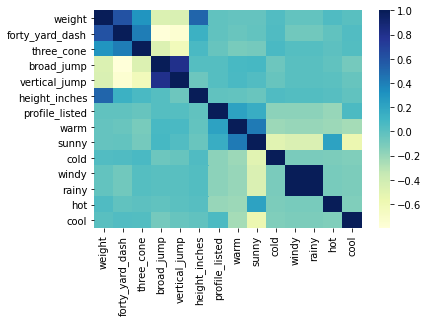

In [7]:
# Drop index column
df.drop('Unnamed: 0', axis=1, inplace = True)
# Set max columns so all of the columns are displayed in each output
pd.set_option('display.max_columns', 500)
# Print correlation coefficients 
print(df.corr())
# Visualize correlation coefficients
sns.heatmap(df.corr(),  cmap="YlGnBu")

In [8]:
# Three cone column has an outlier (105) that needs to be excluded
df.three_cone.value_counts().sum

<bound method Series.sum of 7.500      249
7.750      225
7.780      216
7.530      203
8.000      184
          ... 
7.285        1
8.303        1
7.478        1
7.357        1
105.000      1
Name: three_cone, Length: 1051, dtype: int64>

In [9]:
max_threshold = df['three_cone'].quantile(0.9999)
max_threshold

19.24528599999521

In [10]:
df[df['three_cone']> max_threshold]

,first_name,last_name,state,position,height,weight,forty_yard_dash,shuttle_run,three_cone,broad_jump,vertical_jump,conditions,grade,height_inches,profile_listed,warm,sunny,cold,windy,rainy,hot,cool
2097,Jordan,Amadi,MD,LB,5'10,226.0,5.232,NaN,20.0,NaN,NaN,sunny,Sophomore,70.0,1,0,1,0,0,0,0,0
3786,Patrick,Zhang,VA,WR,5'11,178.0,4.465,7.37,105.0,24.3,NaN,sunny,Junior,71.0,1,0,1,0,0,0,0,0


In [11]:
# Removing outliers
df = df[df['three_cone'] < max_threshold]

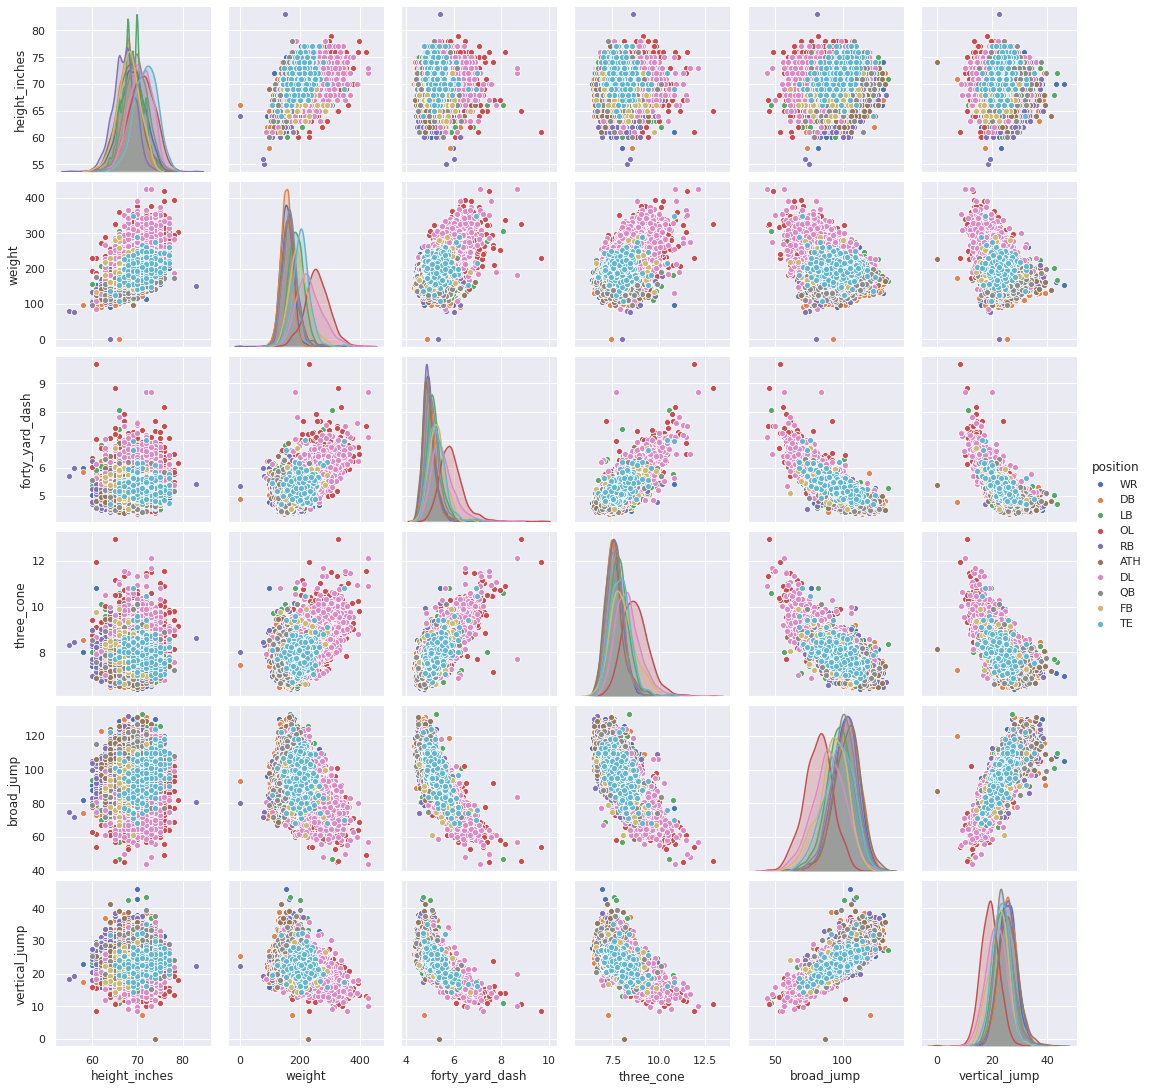

In [12]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
# Setting the style of every graph in the notebook
sns.set()
sns.pairplot(df[['height_inches', 'weight', 'forty_yard_dash', 'three_cone', 'broad_jump', 'vertical_jump', 'shuttle_run', 'position']], hue='position')

Height and weight seem to be influences in how a player performs in the physical tests which makes sense. Heavier players performed slower in the speed tests and lighter players also outperformed them on the jumping tests.

In [13]:
# Make dataframes for numeric and categorical columns
df_num = df[['height_inches', 'weight', 'forty_yard_dash', 'three_cone', 'broad_jump', 'vertical_jump', 'shuttle_run']]
df_cat = df[['position', 'first_name', 'last_name', 'state', 'grade', 'warm', 'sunny', 'cold', 'windy', 'rainy', 'hot', 'cool', 'conditions']]

In [14]:
# Sets shuttle run column to numeric values. This will make it to where a histogram can be plotted for the column.
df_num['shuttle_run'] = pd.to_numeric(df_num.shuttle_run, errors='coerce')

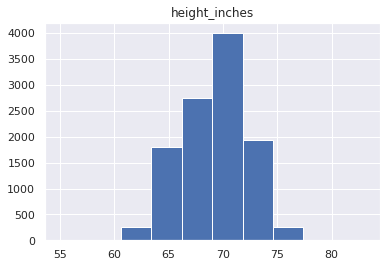

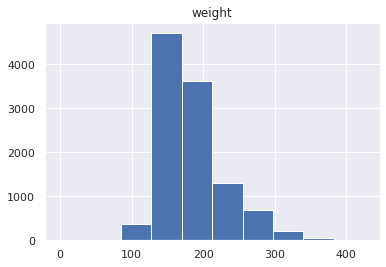

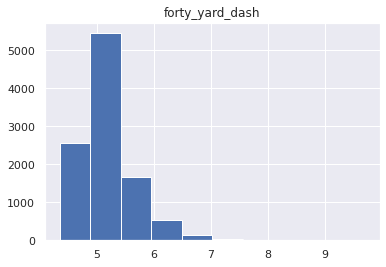

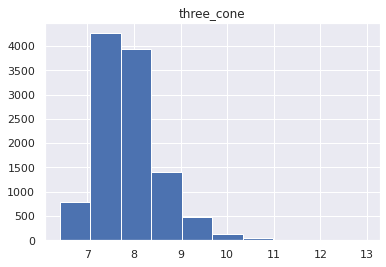

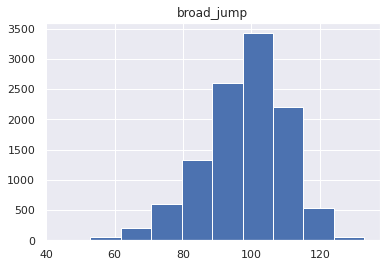

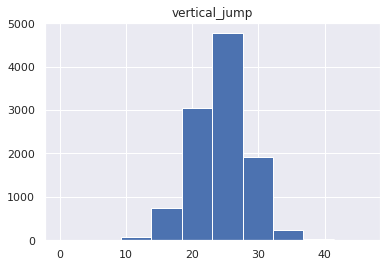

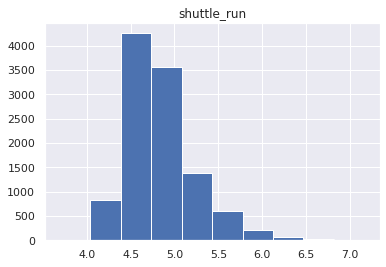

In [15]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Each histogram seems to be close to a normal distribution.

                 height_inches    weight  forty_yard_dash  three_cone  \
height_inches         1.000000  0.517071         0.132544    0.109227   
weight                0.517071  1.000000         0.609478    0.525099   
forty_yard_dash       0.132544  0.609478         1.000000    0.752567   
three_cone            0.109227  0.525099         0.752567    1.000000   
broad_jump            0.027205 -0.467411        -0.798882   -0.727356   
vertical_jump        -0.058819 -0.450231        -0.748860   -0.624849   
shuttle_run           0.128204  0.567917         0.795002    0.800579   

                 broad_jump  vertical_jump  shuttle_run  
height_inches      0.027205      -0.058819     0.128204  
weight            -0.467411      -0.450231     0.567917  
forty_yard_dash   -0.798882      -0.748860     0.795002  
three_cone        -0.727356      -0.624849     0.800579  
broad_jump         1.000000       0.806519    -0.747536  
vertical_jump      0.806519       1.000000    -0.663912  
shuttle_r

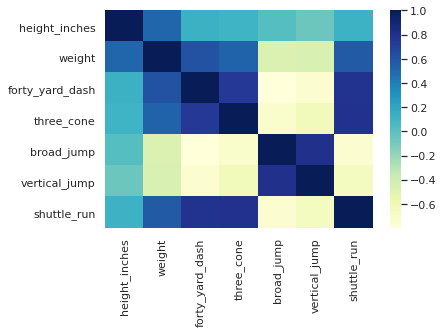

In [16]:
print(df_num.corr())
sns.heatmap(df_num.corr(), cmap="YlGnBu")

Largest positive correlation coefficients between features:

*   **Broad Jump & Vertical Jump:** .80
*   **Forty Yard Dash & Three Cone:** .75
*   **Forty Yard Dash & Weight:** .60
*   **Three Cone & Weight:** .52
*   **Height & Weight:** .51

Largest negative correlation coefficients between features:


*   **Broad Jump & Forty Yard Dash:** -.79
*   **Vertical Jump & Forty Yard Dash:** -.74
*   **Shuttle Run & Broad Jump:** -.74
*   **Three Cone & Broad Jump:** -.72
*   **Shuttle Run & Vertical Jump:** -.72
*   **Three Cone & Vertical Jump:** -.62
*   **Shuttle Run & Weight:** -.56
*   **Broad Jump & Weight:** -.46
*   **Vertical Jump & Weight:** -.45



In [17]:
pd.pivot_table(df, index = 'position', values = ['forty_yard_dash', 'three_cone', 'broad_jump', 'vertical_jump', 'shuttle_run'])

,broad_jump,forty_yard_dash,three_cone,vertical_jump
position,,,,
ATH,103.150000,4.990223,7.608577,25.826740
DB,103.447072,4.981638,7.612921,26.028843
DL,89.845230,5.549947,8.357927,21.602153
FB,92.573034,5.314159,8.070429,22.357955
LB,97.672137,5.192000,7.875419,24.138053
OL,82.138220,5.914996,8.766421,19.315466
QB,100.209596,5.116323,7.682956,24.408986
RB,101.544194,4.973078,7.666899,25.749640
TE,96.853333,5.306877,7.956392,23.257207


Lineman, both offensive and defensive, perform worse on each drill.

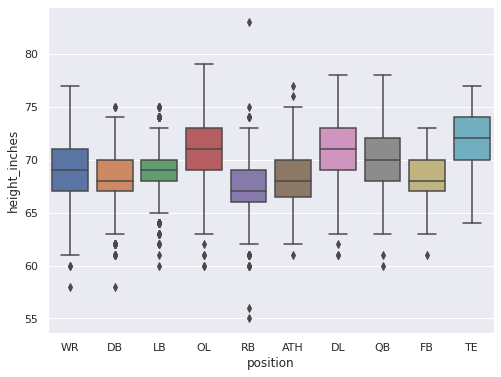

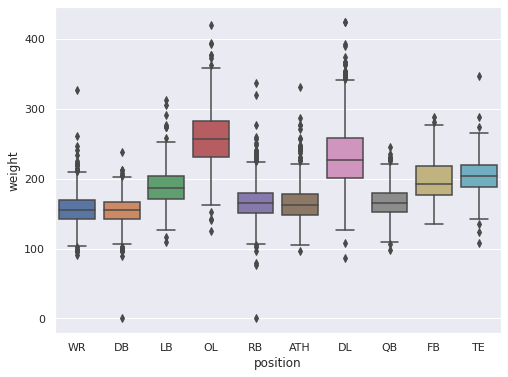

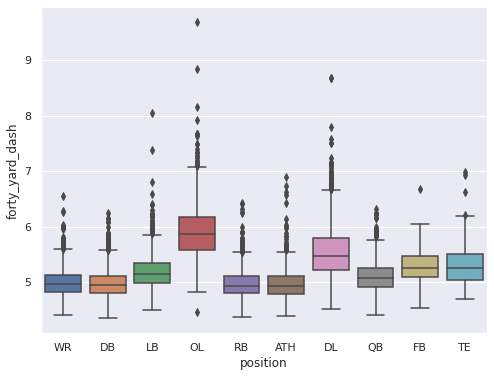

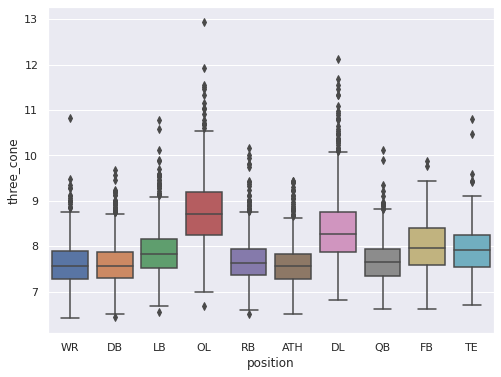

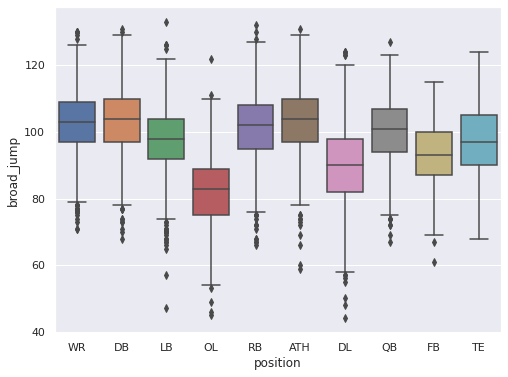

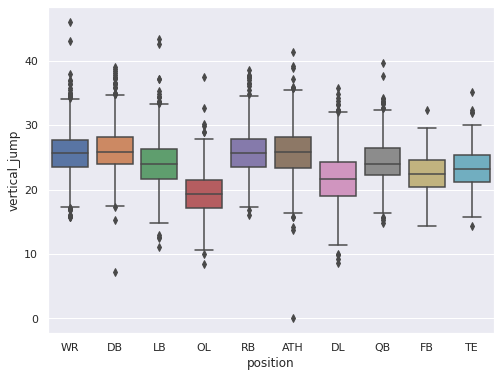

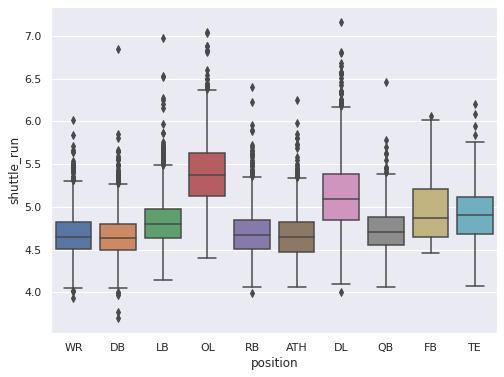

In [18]:
#box plot position/drill
for i in df_num.columns: 
  var = str(i)
  data = pd.concat([df['position'], df_num[var]], axis=1)
  f, ax = plt.subplots(figsize=(8, 6))
  fig = sns.boxplot(x='position', y=var, data=data)

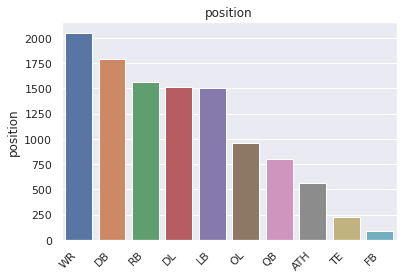

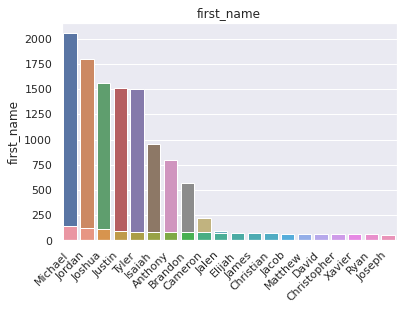

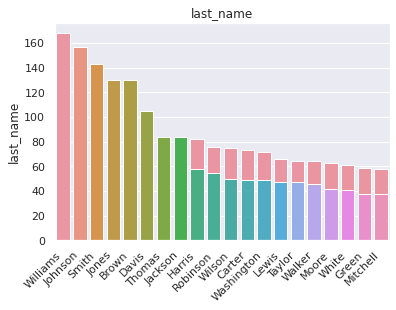

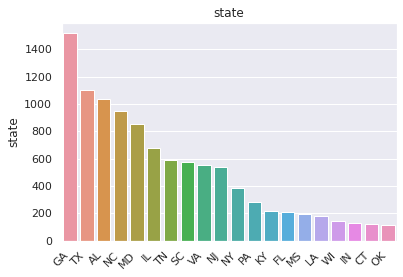

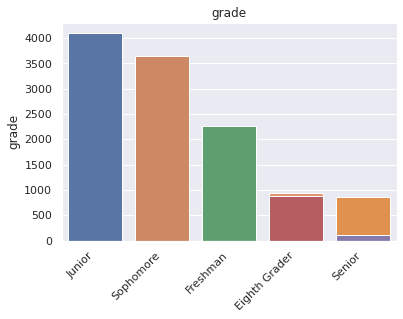

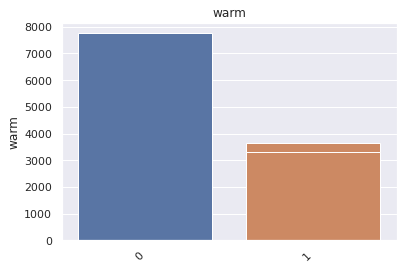

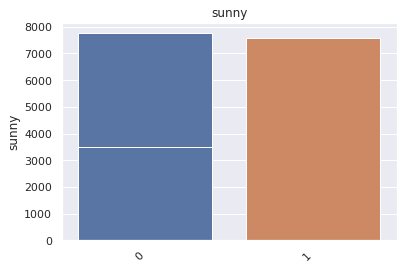

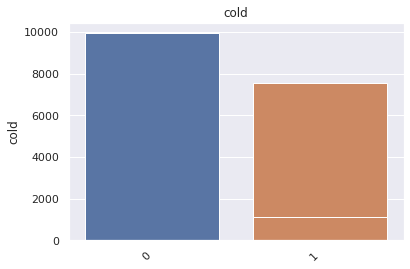

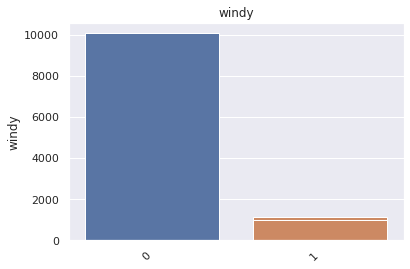

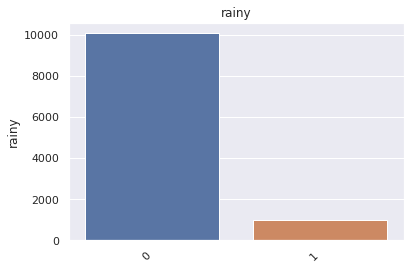

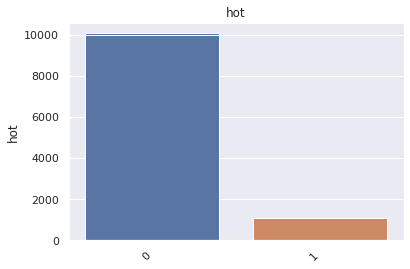

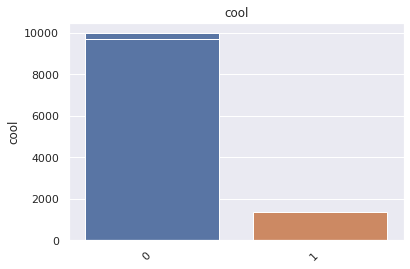

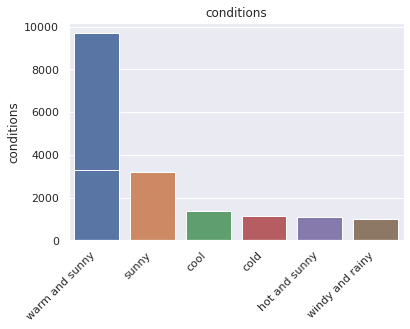

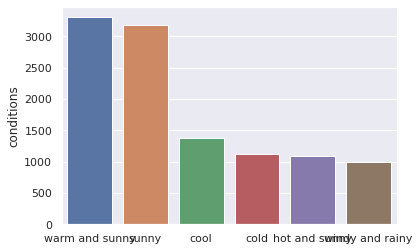

In [19]:
for i in df_cat.columns:
      cat_num = df_cat[i].value_counts()[:20]
      chart = sns.barplot(x=cat_num.index, y=cat_num)
      chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontweight='light', horizontalalignment='right')
      plt.title(i)
      plt.show()
      sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())

In [20]:
pd.pivot_table(data= df,index='position', values=['height_inches', 'weight'])

,height_inches,weight
position,,
ATH,68.309059,165.823741
DB,68.116396,154.465391
DL,70.656021,232.052333
FB,68.175824,197.989011
LB,68.969980,188.328198
OL,71.007345,258.030591
QB,69.859671,166.270992
RB,67.093770,166.526112
TE,71.840708,203.736607


In [21]:
# Visualizing null values
df.stb.missing(style = True) 

,missing,total,percent
forty_yard_dash,655,"11,068",5.92%
vertical_jump,262,"11,068",2.37%
shuttle_run,122,"11,068",1.10%
weight,105,"11,068",0.95%
broad_jump,90,"11,068",0.81%
grade,83,"11,068",0.75%
height,49,"11,068",0.44%
height_inches,49,"11,068",0.44%
position,2,"11,068",0.02%
first_name,0,"11,068",0.00%


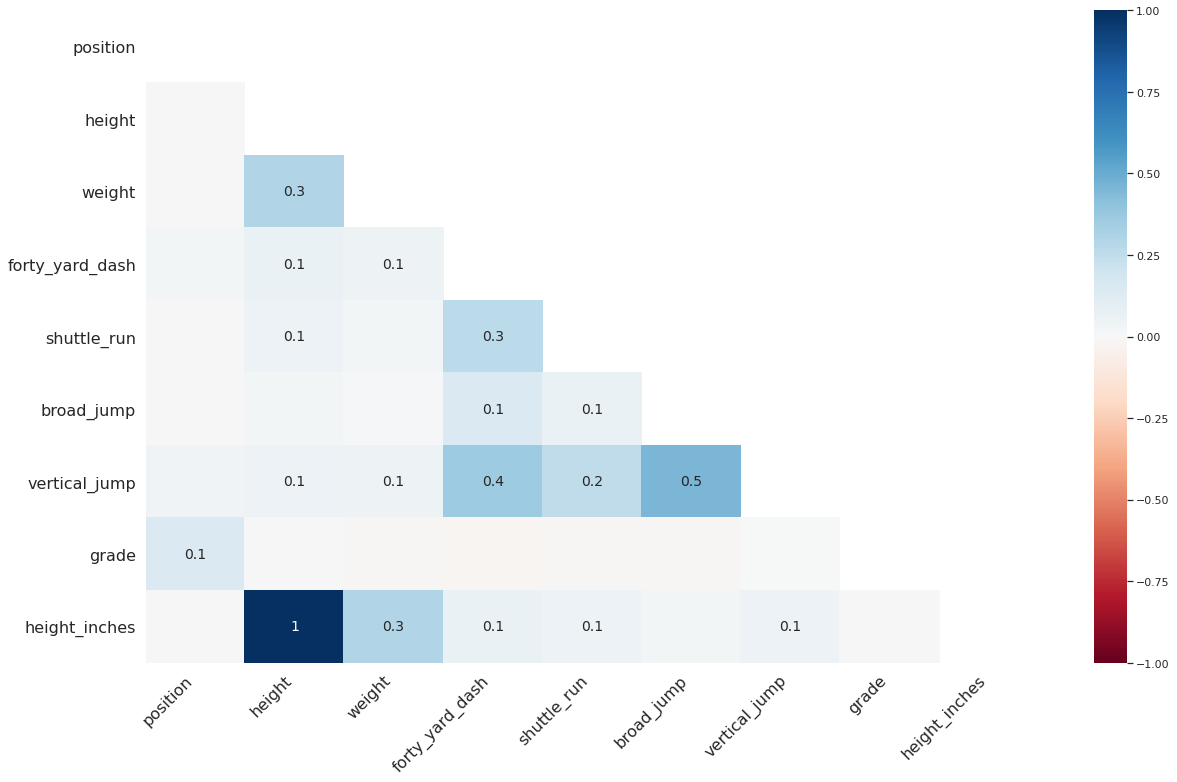

In [22]:
# Displays a correlation of missingness 
msno.heatmap(df)

In [23]:
# drop position 'ATH'
df = df[df['position'] != 'ATH']

# drop all null values 
df.dropna(how='any', inplace = True)

# see how many rows there are to work with
df.shape

(9578, 22)

In [24]:
# Output the data for model building
df.to_csv('football_preprocessed_df.csv')